In [1]:
### Import the libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("/content/AutoInsurance.csv")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.isnull().sum()

,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
Effective To Date,0
EmploymentStatus,0
Gender,0
Income,0


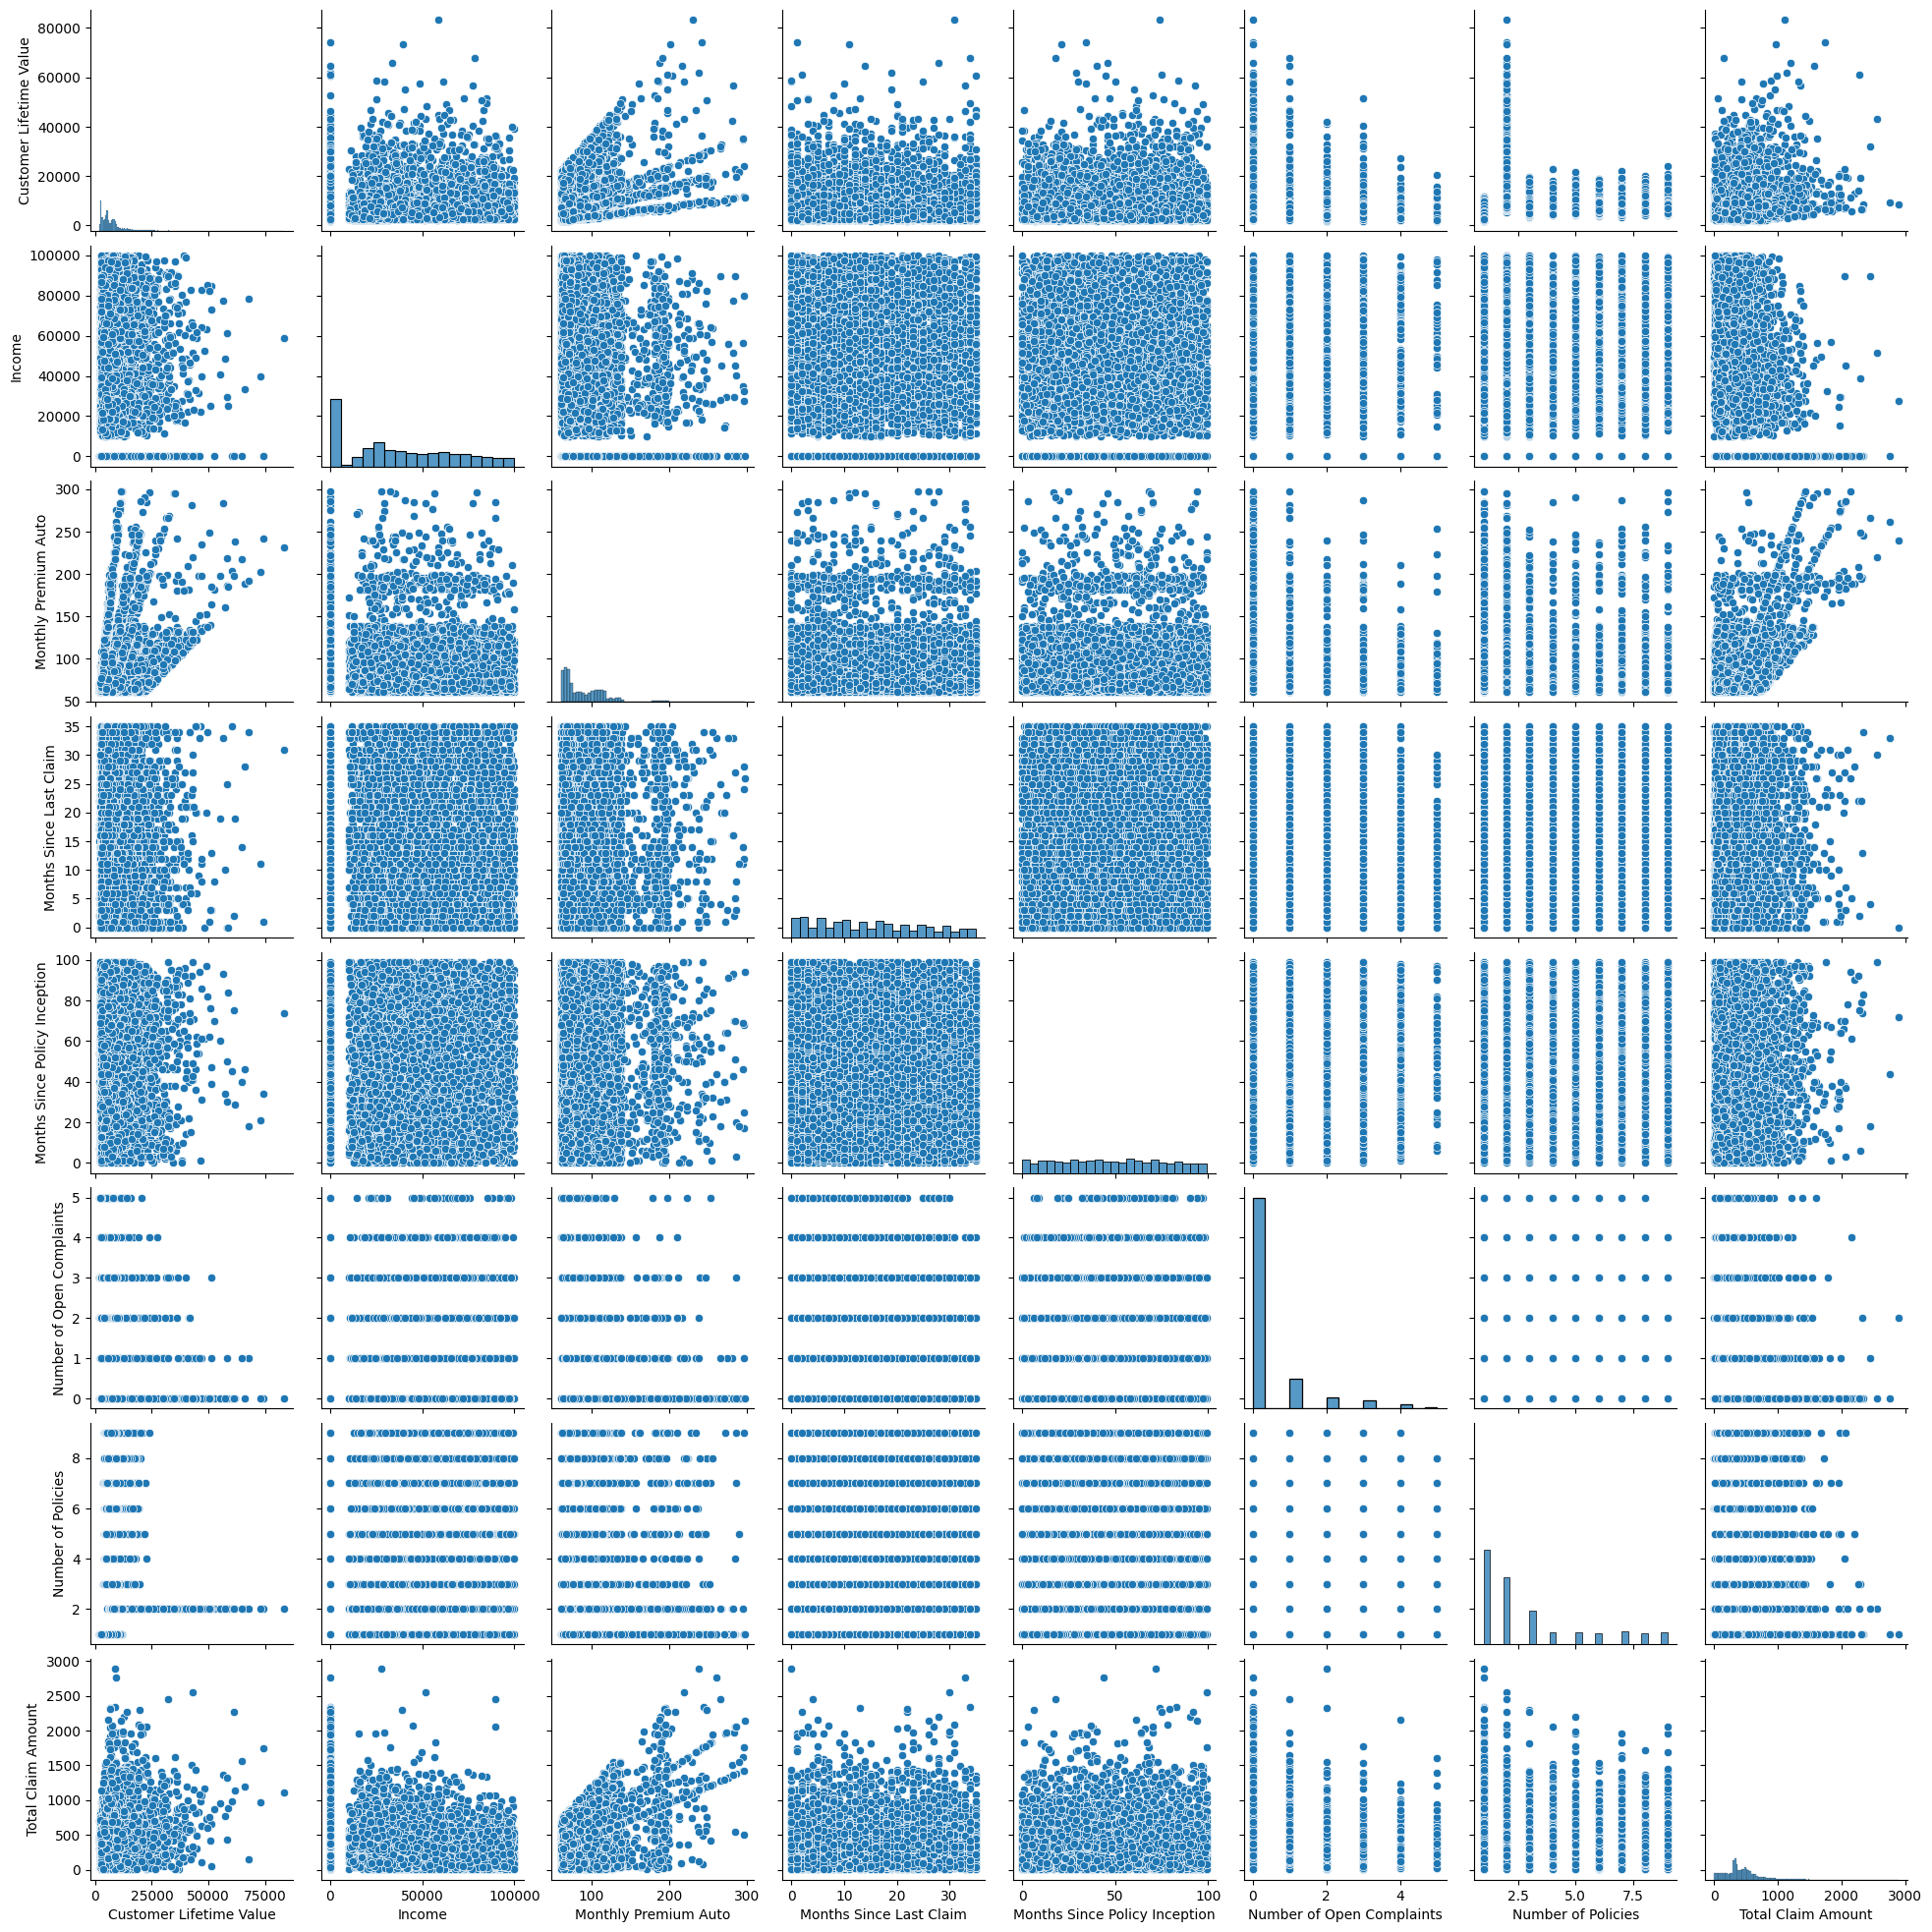

In [6]:
sns.pairplot(df)

In [7]:
df.corr(numeric_only=True)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [8]:
df=df.drop(["Customer","Effective To Date"],axis=1)

In [9]:
df.shape

(9134, 22)

In [10]:
# prompt: Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use Label Encoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])


In [11]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [12]:
df.dtypes

,0
State,int64
Customer Lifetime Value,float64
Response,int64
Coverage,int64
Education,int64
EmploymentStatus,int64
Gender,int64
Income,int64
Location Code,int64
Marital Status,int64
